In [5]:
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm.auto import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import numpy as np
import pandas as pd

In [60]:
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm.auto import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import numpy as np
import pandas as pd

maps =  ["project4_EP/sourceNotebooks/data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits"]

for x in range(len(maps)):
    beam = 10
    filepath = maps[x]

    pl = hp.read_map(filepath)
    pl[pl<-1e23]=0
    shape,wcs = enmap.fullsky_geometry(res=int(beam)*utils.arcmin,proj='car')
    map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

    awd_not_psz = pd.read_csv('project4_EP/sourceNotebooks/src/wh22.csv', skiprows = 0)
    
    zs = [0, 0.72, 100]
    masses = [0, 1, 100000]

    stacks4 = []
    lens = []
    riches = []
    reds = []

    for j in tqdm(range(len(zs))):
        for k in range(len(masses)):
#             if k==1 or k==2:
#                 continue
            stack_CMB_kSZ           = 0
            stack_CMB_kSZ_deproject = 0
            c = 0
            riches.append(masses[k])
            reds.append(zs[j])
            if j == len(zs)-1:
                if k == len(masses)-1:
                    ras = awd_not_psz[(awd_not_psz.z<zs[j]) & (awd_not_psz.z>0) & (awd_not_psz.m<masses[k]) & (awd_not_psz.m>=0)]['ra'].reset_index(drop=True)
                    decs = awd_not_psz[(awd_not_psz.z<zs[j]) & (awd_not_psz.z>0) & (awd_not_psz.m<masses[k]) & (awd_not_psz.m>=0)]['dec'].reset_index(drop=True)
                else:
                    ras = awd_not_psz[(awd_not_psz.z<zs[j]) & (awd_not_psz.z>0) & (awd_not_psz.m<masses[k+1]) & (awd_not_psz.m>=masses[k])]['ra'].reset_index(drop=True)
                    decs = awd_not_psz[(awd_not_psz.z<zs[j]) & (awd_not_psz.z>0) & (awd_not_psz.m<masses[k+1]) & (awd_not_psz.m>=masses[k])]['dec'].reset_index(drop=True)
            elif k == len(masses)-1:
                ras = awd_not_psz[(awd_not_psz.z<zs[j+1]) & (awd_not_psz.z>zs[j]) & (awd_not_psz.m<masses[k]) & (awd_not_psz.m>=0)]['ra'].reset_index(drop=True)
                decs = awd_not_psz[(awd_not_psz.z<zs[j+1]) & (awd_not_psz.z>zs[j]) & (awd_not_psz.m<masses[k]) & (awd_not_psz.m>=0)]['dec'].reset_index(drop=True)
            else:
                ras = awd_not_psz[(awd_not_psz.z<zs[j+1]) & (awd_not_psz.z>zs[j]) & (awd_not_psz.m<masses[k+1]) & (awd_not_psz.m>=masses[k])]['ra'].reset_index(drop=True)
                decs = awd_not_psz[(awd_not_psz.z<zs[j+1]) & (awd_not_psz.z>zs[j]) & (awd_not_psz.m<masses[k+1]) & (awd_not_psz.m>=masses[k])]['dec'].reset_index(drop=True)

            N = len(ras)
            lens.append(N)

            for i in tqdm(range(N)):
#                 dust = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=30*utils.arcmin)
                stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=beam*utils.arcmin)
                if stamp is None:
                    continue
                elif stamp[0][0][0]==0.0:
                    continue
#                 elif dust is None:
#                     continue
#                 elif dust[0][0][0]==0.0:
#                     continue
                else:
#                     dust_sum = sum(sum(dust[0]))
#                     num_pix_dust = len(dust[0][0])*len(dust[0][0])            
                    stack_CMB_kSZ += (np.array(stamp))#-(dust_sum/num_pix_dust))
                    c+=1

            # Normalize the stamps
            stack_CMB_kSZ /= c
            stack_CMB_kSZ_deproject /= c

            stacks4.append(stack_CMB_kSZ[0])
    np.save('857_fix3.npy'.format(x),stacks4)
    np.savetxt('lens3.txt',lens)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/35902 [00:00<?, ?it/s]

  0%|          | 0/39119 [00:00<?, ?it/s]

  0%|          | 0/75021 [00:00<?, ?it/s]

  0%|          | 0/27954 [00:00<?, ?it/s]

  0%|          | 0/48255 [00:00<?, ?it/s]

  0%|          | 0/76209 [00:00<?, ?it/s]

  0%|          | 0/63863 [00:00<?, ?it/s]

  0%|          | 0/87381 [00:00<?, ?it/s]

  0%|          | 0/151244 [00:00<?, ?it/s]

In [46]:
k=0

In [47]:
len(awd_not_psz[(awd_not_psz.z<zs[j]) & (awd_not_psz.z>0) & (awd_not_psz.m<masses[k+1]) & (awd_not_psz.m>=masses[k])]['ra'].reset_index(drop=True))

63863

In [61]:
stacks=stacks4

In [44]:
stacks = np.load('_stacks_act_857_0.npy')
stacks[1] = stacks2[0]
stacks[4] = stacks2[1]
stacks[7] = stacks2[2]

lens2 = np.loadtxt('lens.txt')
lens = [28396, int(lens2[0]), 75021, 22154, int(lens2[1]), 76209, 50556, int(lens2[2]), 151244]

In [6]:
# stacks = np.load('_stacks_act_857_0.npy')
# stacks2 = np.load('857_fix.npy')
# stacks3 = np.load('857_fix2.npy')
stacks = np.load('857_fix3.npy')
# stacks[0] = stacks3[0]
# stacks[1] = stacks2[0]
# stacks[3] = stacks3[1]
# stacks[4] = stacks2[1]
# stacks[6] = stacks3[2]
# stacks[7] = stacks2[2]

lens = [35902,38207,75021,27954,47132,76209,63863,85346,151244]

NameError: name 'x' is not defined

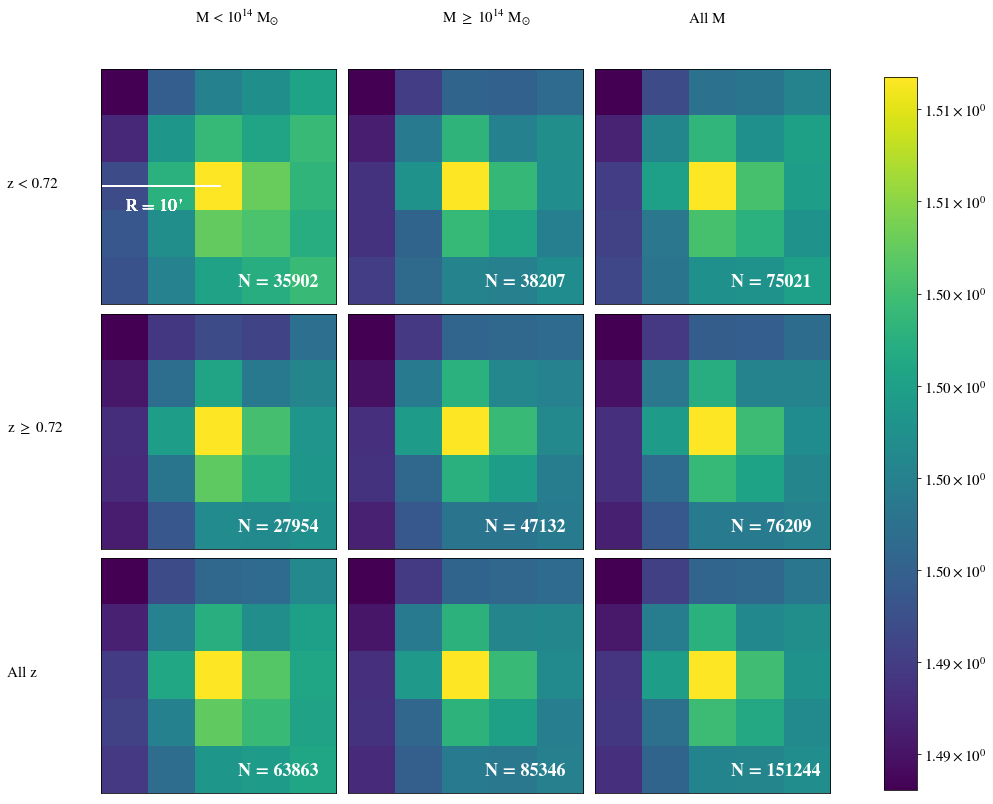

In [7]:
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

f, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
i = 0

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

for j,row in enumerate(ax):
    for k, col in enumerate(row):
        f1 = col.imshow(stacks[i])
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
#         plt.colorbar(mappable = f1, ax = col,orientation='horizontal',fraction=0.047, pad=0.02)
#         cbar = plt.colorbar(mappable = f1, ax = col,orientation='horizontal',fraction=0.047, pad=0.02)
#         cbar.ax.tick_params(rotation=25)

        scalebar = AnchoredSizeBar(ax[0][0].transData,
                                   2.5, '', 'center left', 
                                   pad=0.,
                                   sep=-7,
                                   color='white',
                                   frameon=False,
                                   size_vertical=0.02)
        ax[0][0].add_artist(scalebar)
        ax[0][0].text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax[0][0].transAxes)

        col.text(2.4,4.12,"N = {}".format(lens[i]),fontsize=18,color='white',weight=600)
#         if j==0 and k==0:
#             col.text(-15,20,"z<0.72",size=15)
#         if j==1 and k==0:
#             col.text(-15,20,"z>0.72",size=15)
#         if j==2 and k==0:
#             col.text(-15,20,"all z",size=15)
#         if k==0 and j==0:
#             col.text(15,-5,"M<1$M_{\astrosun}$",size=15)
#         if k==1 and j==0:
#             col.text(15,-5,"M>1$M_{\astrosun}$",size=15)
#         if k==2 and j==0:
#             col.text(15,-5,"all M",size=15)
        if j==0 and k==0:
            col.text(-.4,.5,"z < 0.72",size=15,transform=col.transAxes)
        if j==1 and k==0:
            col.text(-.4,.5,"z $\geq$ 0.72",size=15,transform=col.transAxes)
        if j==2 and k==0:
            col.text(-.4,.5,"All z",size=15,transform=col.transAxes)
        if k==0 and j==0:
            col.text(.4,1.2,"M < 10$^{14}$ M$_{\odot}$",size=15,transform=col.transAxes)
        if k==1 and j==0:
            col.text(.4,1.2,"M $\geq$ 10$^{14}$ M$_{\odot}$",size=15,transform=col.transAxes)
        if k==2 and j==0:
            col.text(.4,1.2,"All M",size=15,transform=col.transAxes)

        i+=1
    
f.subplots_adjust(right=0.8)
plt.subplots_adjust(wspace=0.05, hspace=-0.25)
cbar_ax = f.add_axes([0.85, 0.17, 0.03, 0.66])
cbar = f.colorbar(f1, cax=cbar_ax, format=FuncFormatter(fmt))
cbar.ax.tick_params(labelsize=15) 

plt.savefig("857.png".format(x))


In [2]:
def import_map(filepath):
    map_pix = enmap.read_map(filepath)
    return map_pix

def extract_intensity(map_pix, ras, decs, beam):
    N = len(ras)
    stack_CMB_kSZ           = 0
    stack_CMB_kSZ_deproject = 0
    c = 0

    signal = []
    ras_used = []
    decs_used = []
    for i in tqdm(range(N)):
        stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=beam*utils.arcmin)
        if stamp is None:
            signal.append(-9999)
        elif stamp[0][0][0]==0.0:
            signal.append(-9999)
        else:
            signal_sum = sum(sum(stamp[0]))
            num_pix_signal = len(stamp[0][0])*len(stamp[0][0])
            signal.append(signal_sum/num_pix_signal)
        ras_used.append(ras[i])
        decs_used.append(decs[i])

    return signal, ras_used, decs_used


def output_signal(signal,output_fp,ras_used,decs_used,output_fp_rasdecs):
    np.savetxt(output_fp,
               signal,
               delimiter=", ",
               fmt='% s')
    np.savetxt(output_fp_rasdecs[0],
               ras_used,
               delimiter=", ",
               fmt='% s')
    np.savetxt(output_fp_rasdecs[1],
               decs_used,
               delimiter=", ",
               fmt='% s')

In [3]:
if __name__ == "__main__":
#    voids = pd.read_csv('project4_EP/sourceNotebooks/data/voids_df.csv',skiprows=0,index_col=0)
    voids = pd.read_csv('project4_EP/sourceNotebooks/voids_.csv',skiprows=0,index_col=0)
    ras_voids = voids['ras'].reset_index(drop=True)
    decs_voids = voids['decs'].reset_index(drop=True)

    ras_all = ras_voids#, ras_real, ras_fsky]
    decs_all = decs_voids#, decs_real, decs_fsky]

    beam = 1.4
    map_pix = import_map("project4_EP/sourceNotebooks/data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
    outputs = "090_voids_test.csv"
    rasdecs = ["ras_090_voids_test.csv","decs_090_voids_test.csv"]

    signal, ras_used, decs_used = extract_intensity(map_pix, ras_all, decs_all, beam)
    output_signal(signal, outputs, ras_used, decs_used, rasdecs)

100%|██████████| 47231/47231 [11:55<00:00, 65.99it/s]


In [4]:
pwd

'/home/maamari/Documents/GitHub/USCCosmology'